In [65]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score #we need this function from sklearn
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error 

df1 = pd.read_csv(('steps.csv'), delimiter= ';')
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [67]:
df = pd.merge(df1, df2, on = 'id') #'app' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [68]:
df['weight'].value_counts() #Get all the values. This may be less useful when there are many values.

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

In [69]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def abnormalweight(x):
    if(x < 50.0) or (x > 150.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(abnormalweight)


C:\Users\Robin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


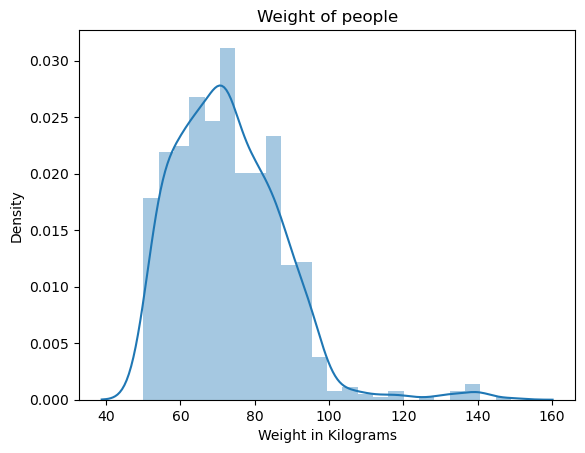

In [70]:
sns.distplot(df['weight']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of people')
plt.xlabel('Weight in Kilograms')
plt.show()

In [71]:
df['mean_steps'] = df.iloc[:,1:329].mean(axis=1)
df['median_steps'] = df.iloc[:,1:329].median(axis=1)
df['mean_steps'] = df['mean_steps'].apply(pd.to_numeric, errors='coerce')
#in het voorbeeld pak je de mediaan en mean van size. Hier reken je eerst apart mediaan en mean uit dan laat je de mean zien in een plot en dan wil je de median steps laten zien in een plot die de mean laat zien
mean_stepsline = df['mean_steps'].mean()
median_stepsline = df['median_steps'].median()
def above_5(x):
    if(x > 100000.0) or (x < 1000): 
        return float('NaN')
    else: 
        return x
df['mean_steps'] = df['mean_steps'].apply(above_5)


df = df[df['mean_steps'] < 18000]
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,median_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,4986.5


C:\Users\Robin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


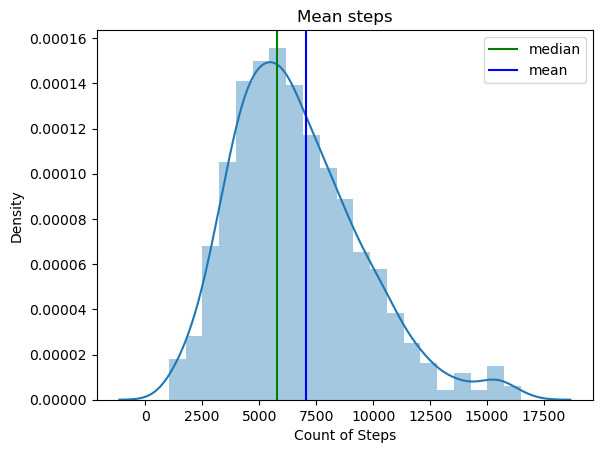

In [72]:
sns.distplot(df['mean_steps']) 
plt.title('Mean steps')
plt.xlabel('Count of Steps')
plt.axvline(median_stepsline, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_stepsline, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()


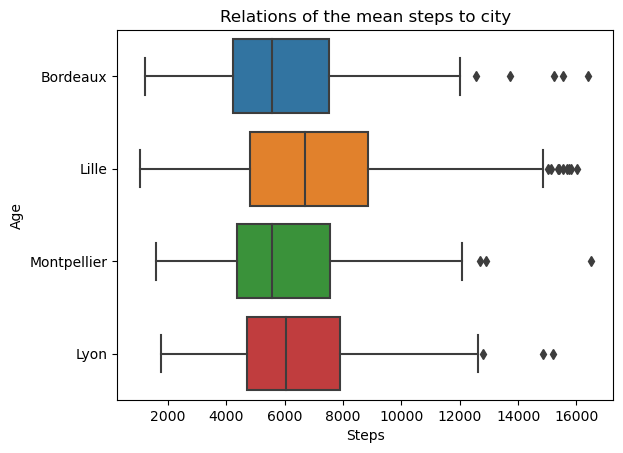

In [73]:
#sns.barplot(data=df, x='age' ,y='mean_steps',hue='gender') 
sns.boxplot(data=df, y='city' ,x='mean_steps') 
plt.title('Relations of the mean steps to city')
plt.ylabel('Age')
plt.xlabel('Steps')
plt.show()

In deze boxplot zie je dat het gemiddelde aantal stappen vrij dicht bij elkaar ligt. Wat interessant is dat in Lille de spreiding heel groot is, maar de mediaan het hoogste. Wat opvalt aan alle verschillende verbanden die je zoekt qua leeftijd/stad/educatie is dat alles heel dicht bij eklaar ligt qua gemiddelde stappen. In lille wordt over het algemeen het meest aantal stappen gezet en in Bordeaux het minst. Wat nog meer opvalt is dat in Montpellier over het algemeen als 2e het meeste stappen worden gelopen maar dat de mediaan bijna het laagste ligt van allemaal. 


Ik weet alleen niet wat die tekentjes zijn er achter


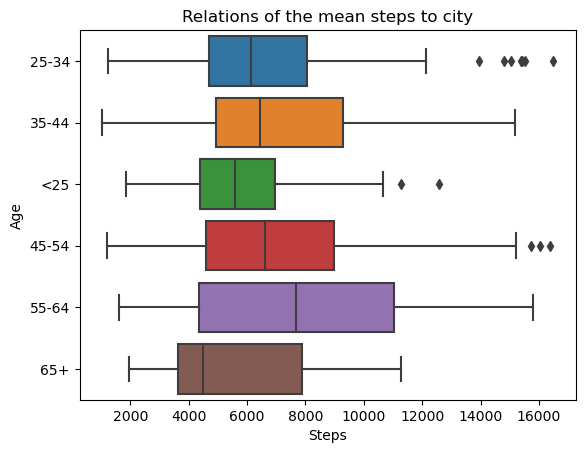

In [74]:
sns.boxplot(data=df, y='age' ,x='mean_steps') 
plt.title('Relations of the mean steps to city')
plt.ylabel('Age')
plt.xlabel('Steps')
plt.show()

Wat mij heel erg opvalt is dat de categorie van 55-64 een stuk meer stappen zet dan de jongere generaties. Dit kan zo zijn omdat zij nog wat meer beroepen uitvoeren die minder gedigitaliseerd zijn en dus meer loopwerk vereisen. Ook zit over het algemeen de jongere generatie meer binnen achter de gaming consoles en computer. Wellicht dat de wat oudere generatie toch vaker buiten is.

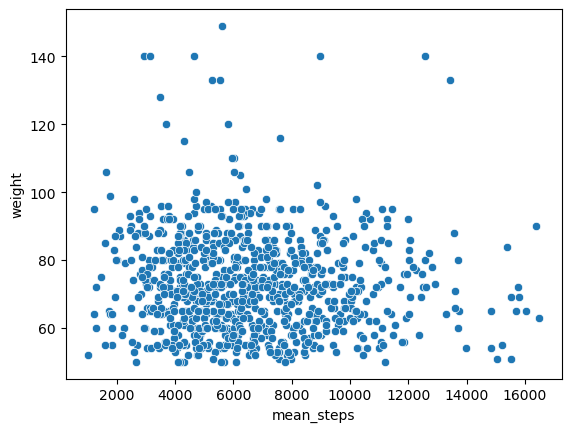

In [75]:
sns.scatterplot(data = df, x = 'mean_steps', y = 'weight')
plt.show()

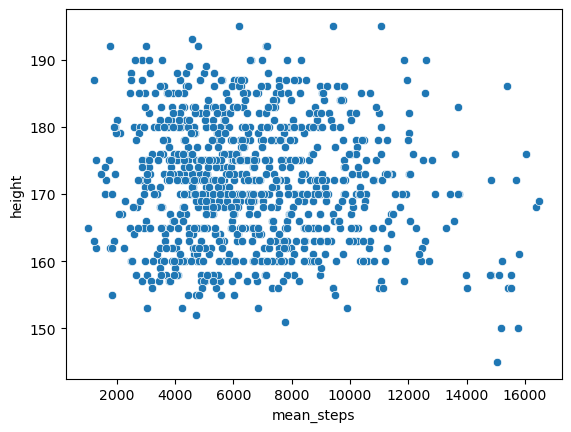

In [76]:
sns.scatterplot(data = df, x = 'mean_steps', y = 'height')
plt.show()

In [77]:
df_corr = df[['mean_steps', 'height', 'weight']].corr()
df_corr

,mean_steps,height,weight
mean_steps,1.000000,-0.085901,-0.068627
height,-0.085901,1.000000,0.490824
weight,-0.068627,0.490824,1.000000


Hierboven staan twee simpele manier om te laten zien hoe correlatie tussen verschillende factoren gevonden kan worden. Hieronder ga ik verder met het berekenen van verschillende correlaties, alleen gebruik ik pairplots en moet ik een dataframe maken zonder de column 'datum'.

In [78]:
import sklearn as sk #this is the most popular library for statistics and machine learning

In [79]:
df_totaal = df[["city", "gender", "age", "hh_size", "education", "education_1", "height", "weight", "mean_steps", "median_steps"]]

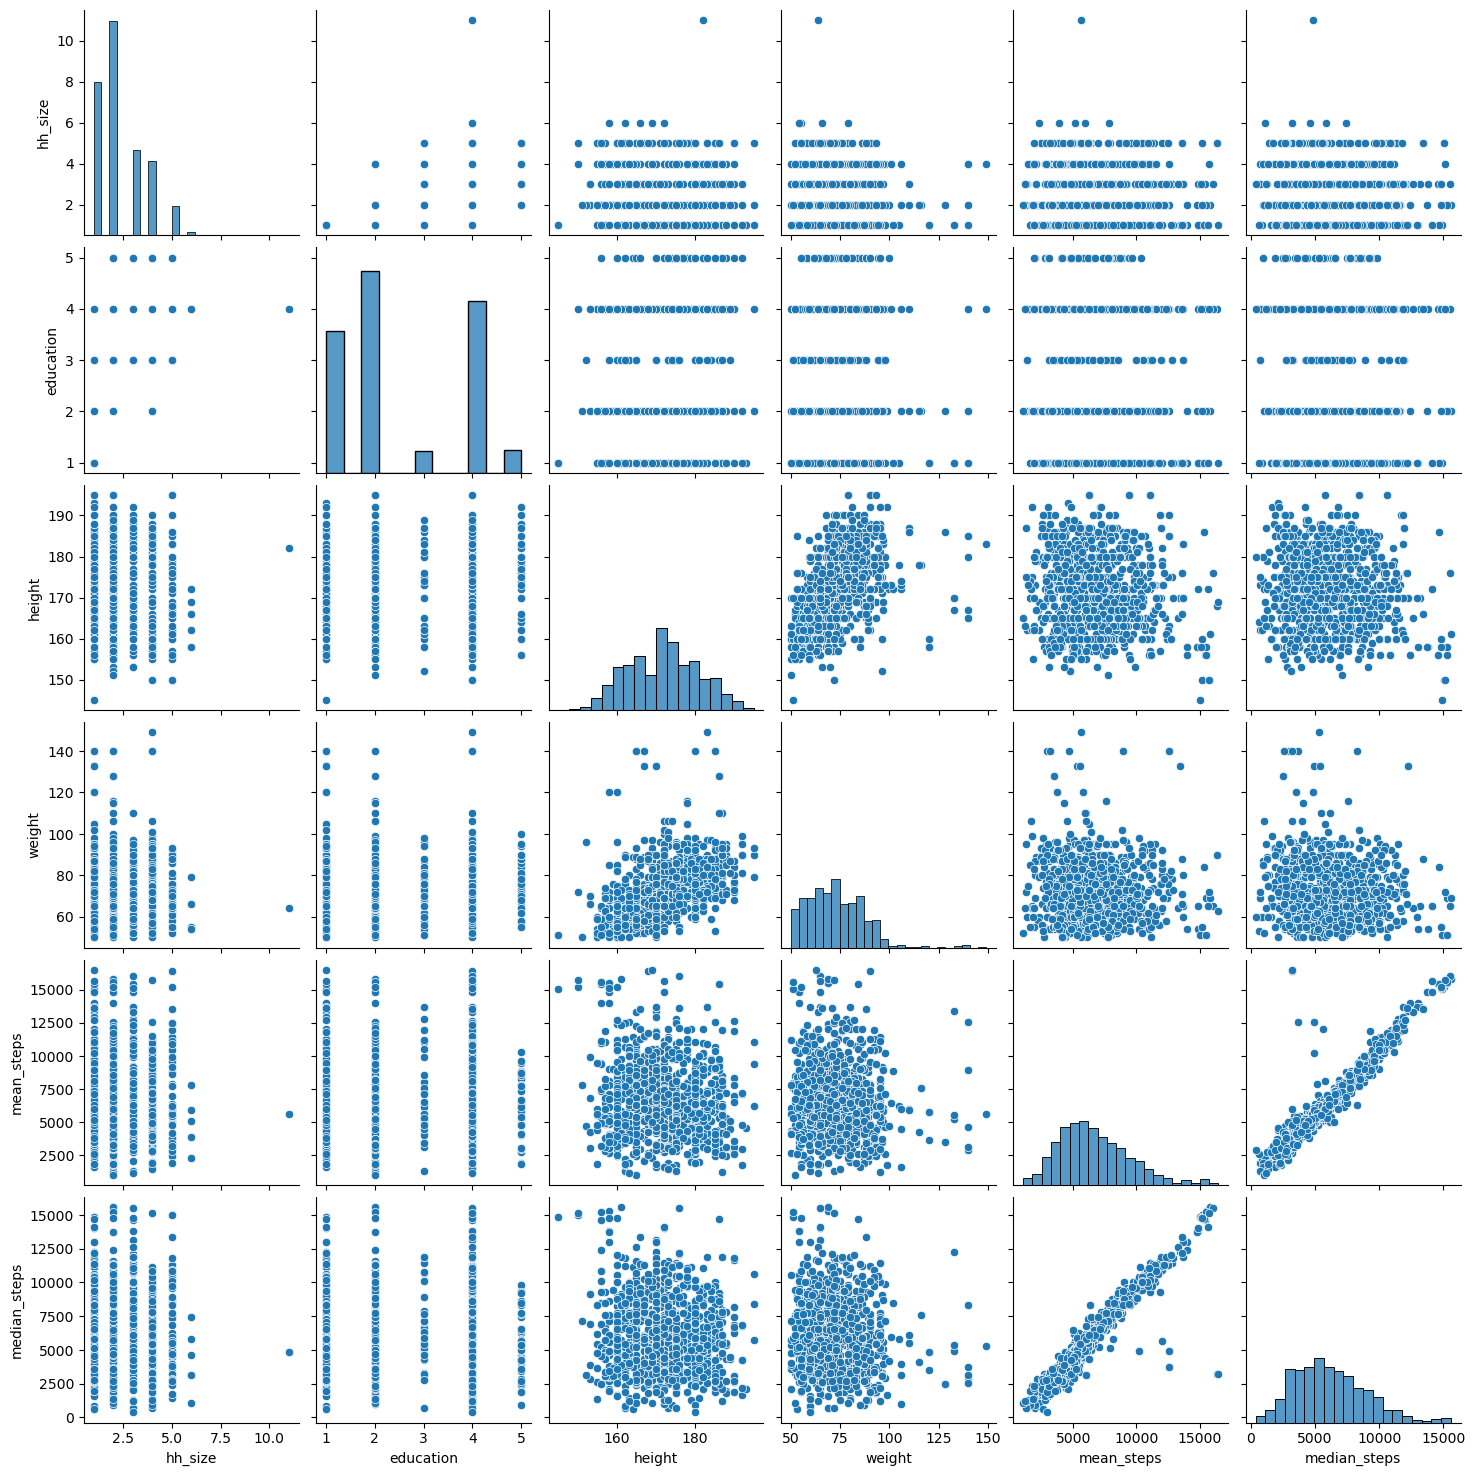

In [80]:
sns.pairplot(df_totaal)
plt.show()

Om de correlatie te berekenen is de .corr() functie handig om te gebruiken.

In [81]:
print(df_totaal.corr())

               hh_size  education    height    weight  mean_steps  \
hh_size       1.000000   0.824800 -0.050216  0.013754    0.031177   
education     0.824800   1.000000 -0.037291  0.010132    0.013688   
height       -0.050216  -0.037291  1.000000  0.490824   -0.085901   
weight        0.013754   0.010132  0.490824  1.000000   -0.068627   
mean_steps    0.031177   0.013688 -0.085901 -0.068627    1.000000   
median_steps  0.027805   0.020444 -0.089764 -0.088749    0.948743   

              median_steps  
hh_size           0.027805  
education         0.020444  
height           -0.089764  
weight           -0.088749  
mean_steps        0.948743  
median_steps      1.000000  


Om te mogen zeggen dat ergens een beetje verband aanwezig is moet er een correlatie zijn van groter dan 0.6. Zoals hierboven af te lezen is hebben de factoren 'education' en 'hh_size' een correlatie van 0.824. En hebben 'mean_steps' en 'median_steps' een correlatie van 0.948. Dit wil dus zeggen dat er in de dataset verder geen echte correlatie ligt tussen de overige factoren. Als we naar gemiddelde stappen per respondent kijken zien we zelfs dat alleen mean_steps en median_steps iets van een correlatie hebben. 

Lineaire regressie is het beste te omschrijven als 'de relatie vinden tussen een X en een Y variabele. Waarbij X een onafhankelijke variabel is.'

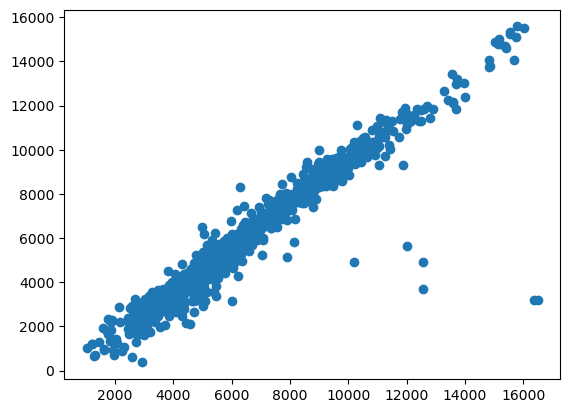

In [82]:
x = df['mean_steps'].values.reshape(-1, 1)
y = df['median_steps'].values.reshape(-1, 1)
lr = LinearRegression()
lr = lr.fit(x, y)

plt.scatter(x, y)
plt.show()

Zoals te zien is er een enorme correlatie tussen mean_steps en median_steps (duh). (ik kan de training data nergens vinden dus dit moet er even mee door sorry <3)

In [89]:
df['median_steps_2'] = lr.predict(x)

In [90]:
r2_score(df['median_steps'], df['median_steps_2'])

0.9001135650193439

In [91]:
sqrt(mean_squared_error(df['median_steps'], df['median_steps_2']))

885.8289105847555

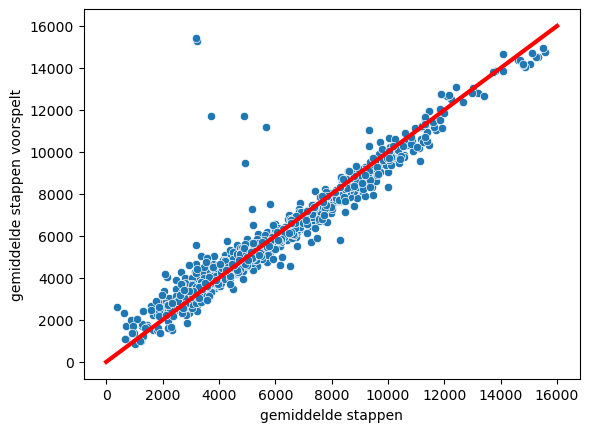

In [93]:
sns.scatterplot(x='median_steps',y='median_steps_2',data=df)
#plt.xlim(0, 50) #This sets the x-axis limits to (0, 5e10 = 5000000000)
#plt.ylim(0, 50) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 16000], [0, 16000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('gemiddelde stappen')
plt.ylabel('gemiddelde stappen voorspelt')
plt.show()

Voor deze opdracht was er niet een bepaald scala aan bruikbare opties om uit te kiezen. Bij het gebruiken van 'median_steps' was er natuurlijk al te zien dat de resultaten bijna perfect zouden zijn, echter vormt dit wel een goeie fundering om de krachten van correlaties en het belang ervan aan te tonen! Als dit met andere factoren zou zijn gedaan dan had je kunnen zeggen dat er hele goeie voorspellingen gedaan kunnen worden met de bovenstaande resultaten!